In [1]:
%matplotlib inline

In [2]:
import pandas as pd
import os
import matplotlib.pyplot as plt
import scipy.stats as st
import numpy as np
from scipy.stats import linregress

In [3]:
import pycountry
import pycountry_convert as pc
from pycountry_convert import country_name_to_country_alpha2
from pycountry_convert import country_alpha2_to_continent_code

In [4]:
## Pulling data from csvs and storing as dataframes and Cleaning our dataframes
pharm_csv = os.path.join(os.getcwd(), "Data", "pharmacists.csv")
pharm_df = pd.read_csv(pharm_csv)
##Changing column names
pharm_df = pharm_df.rename(columns = {"First Tooltip" : "Pharmicists Per 10,000"}).drop(columns =["Indicator"])

In [5]:
med_doctors_csv = os.path.join(os.getcwd(), "Data", "medicalDoctors.csv")
med_doctors_df = pd.read_csv(med_doctors_csv)
##Changing column names
med_doctors_df = med_doctors_df.rename(columns = {"First Tooltip" : "Medical Doctors Per 10,000"}).drop(columns =["Indicator"])

In [6]:
# Taking the csv file of World Life Expectancy & rotating the columns into rows.
life_expect_csv = os.path.join(os.getcwd(), "Data", "LifeExpectancy_world.csv")
life_expect_df = pd.read_csv(life_expect_csv)
life_expect_df = life_expect_df.drop(columns = {"Code"})
life_expect_df = life_expect_df.rename(columns = {'Entity' : 'Location'})
life_expect_df = life_expect_df.melt(['Location'], var_name = 'Period', value_name = 'Life Expectancy')
life_expect_df['Period'] = life_expect_df['Period'].astype(int)
life_expect_df.head()

,Location,Period,Life Expectancy
0,Afghanistan,1950,27.638
1,Africa,1950,36.450
2,Albania,1950,54.191
3,Algeria,1950,42.087
4,American Samoa,1950,63.775


In [7]:
hand_wash_csv = os.path.join(os.getcwd(), "Data", "basicHandWashing.csv")
hand_wash_df = pd.read_csv(hand_wash_csv)
##Changing column names
hand_wash_df = hand_wash_df.rename(columns = {"First Tooltip" : "Population with basic handwashing facilities at home (%)"}).drop(columns =["Indicator"])
hand_wash_df = hand_wash_df[hand_wash_df["Dim1"].str.contains("Urban")==False]
hand_wash_df = hand_wash_df[hand_wash_df["Dim1"].str.contains("Rural")==False]
hand_wash_df = hand_wash_df.drop(columns = {"Dim1"})

In [8]:
drink_water_csv = os.path.join(os.getcwd(), "Data", "basicDrinkingWaterServices.csv")
drink_water_df = pd.read_csv(drink_water_csv)
##Changing column names
drink_water_df = drink_water_df.rename(columns = {"First Tooltip" : "Population using at least basic drinking-water services (%)"}).drop(columns =["Indicator"])

In [9]:
sanitize_csv= os.path.join(os.getcwd(), "Data", "atLeastBasicSanitizationServices.csv")
sanitize_df = pd.read_csv(sanitize_csv)
##Changing column names
sanitize_df = sanitize_df.rename(columns = {"First Tooltip" : "Population using at least basic sanitization services (%)"}).drop(columns =["Indicator"])
sanitize_df = sanitize_df[sanitize_df["Dim1"].str.contains("Urban")==False]
sanitize_df = sanitize_df[sanitize_df["Dim1"].str.contains("Rural")==False]
sanitize_df = sanitize_df.drop(columns = {"Dim1"})

In [10]:
# Merge the Data
merge_df1 = pd.merge(pharm_df, med_doctors_df, on = ["Location", "Period"], how = "outer")
merge_df1

,Location,Period,"Pharmicists Per 10,000","Medical Doctors Per 10,000"
0,Afghanistan,2016,0.47,2.78
1,Afghanistan,2015,0.50,2.85
2,Afghanistan,2014,0.51,2.98
3,Afghanistan,2012,0.27,2.41
4,Afghanistan,2011,0.28,2.52
...,...,...,...,...
2620,Zimbabwe,2011,NaN,0.82
2621,Zimbabwe,2008,NaN,0.60
2622,Zimbabwe,2007,NaN,0.54
2623,Zimbabwe,2005,NaN,1.26


In [11]:
merge_df2 = pd.merge(merge_df1, life_expect_df, on = ["Location", "Period"], how = "outer")
merge_df2

,Location,Period,"Pharmicists Per 10,000","Medical Doctors Per 10,000",Life Expectancy
0,Afghanistan,2016,0.47,2.78,63.763
1,Afghanistan,2015,0.50,2.85,63.377
2,Afghanistan,2014,0.51,2.98,62.966
3,Afghanistan,2012,0.27,2.41,62.054
4,Afghanistan,2011,0.28,2.52,61.553
...,...,...,...,...,...
17253,Western Sahara,2019,NaN,NaN,70.263
17254,World,2019,NaN,NaN,72.584
17255,Yemen,2019,NaN,NaN,66.125
17256,Zambia,2019,NaN,NaN,63.886


In [12]:
merge_df3 = pd.merge(merge_df2, hand_wash_df, on = ["Location", "Period"], how = "outer")
merge_df4 = pd.merge(merge_df3, drink_water_df, on = ["Location", "Period"], how = "outer")
final_merge_df = pd.merge(merge_df4, sanitize_df, on = ["Location", "Period"], how = "outer")
final_merge_df

,Location,Period,"Pharmicists Per 10,000","Medical Doctors Per 10,000",Life Expectancy,Population with basic handwashing facilities at home (%),Population using at least basic drinking-water services (%),Population using at least basic sanitization services (%)
0,Afghanistan,2016,0.47,2.78,63.763,37.67,54.84,42.05
1,Afghanistan,2015,0.50,2.85,63.377,37.59,52.39,40.71
2,Afghanistan,2014,0.51,2.98,62.966,37.52,49.96,39.37
3,Afghanistan,2012,0.27,2.41,62.054,37.37,45.19,36.75
4,Afghanistan,2011,0.28,2.52,61.553,37.30,42.84,35.46
...,...,...,...,...,...,...,...,...
17421,Viet Nam,2004,NaN,NaN,NaN,NaN,79.45,59.79
17422,Viet Nam,2003,NaN,NaN,NaN,NaN,78.47,57.95
17423,Viet Nam,2000,NaN,NaN,NaN,NaN,75.54,52.37
17424,Republic of Korea,2001,NaN,NaN,NaN,NaN,NaN,100.00


In [13]:
final_merge_df.describe()

,Period,"Pharmicists Per 10,000","Medical Doctors Per 10,000",Life Expectancy,Population with basic handwashing facilities at home (%),Population using at least basic drinking-water services (%),Population using at least basic sanitization services (%)
count,17426.000000,1795.000000,2506.000000,17010.000000,921.000000,3455.000000,3439.000000
mean,1985.038334,4.124118,20.685012,63.579816,47.501911,77.847103,71.211966
std,20.283229,3.624610,14.299267,12.073683,32.774406,23.987570,30.342367
min,1950.000000,0.002000,0.130000,18.907000,1.030000,10.130000,3.400000
25%,1967.000000,0.790000,7.782500,55.672750,13.980000,59.895000,45.850000
50%,1985.000000,3.530000,21.280000,66.557500,44.520000,87.650000,85.260000
75%,2003.000000,6.390000,31.660000,72.747000,81.740000,98.460000,97.630000
max,2019.000000,26.300000,84.220000,86.751000,100.000000,100.000000,100.000000


In [14]:
## Clean data frame of countries with invalid location names for conversion
for index, row in final_merge_df.iterrows():
    country = row['Location']
    if country == "Bolivia (Plurinational State of)":
        change_country = "Bolivia"
        final_merge_df.loc[ index, "Location"] = change_country
    if country == "Côte d’Ivoire":
        change_country = "Ivory Coast"
        final_merge_df.loc[ index, "Location"] = change_country
    if country == "Iran (Islamic Republic of)":
        change_country = "Iran"
        final_merge_df.loc[ index, "Location"] = change_country
    if country == "Republic of Korea":
        change_country = "South Korea"
        final_merge_df.loc[ index, "Location"] = change_country
    if country == "Sudan (until 2011)":
        change_country = "Sudan"
        final_merge_df.loc[ index, "Location"] = change_country
    if country == "Timor-Leste":
        change_country = "East Timor"
        final_merge_df.loc[ index, "Location"] = change_country
    if country == "Micronesia (Federated States of)":
        change_country = "Micronesia"
        final_merge_df.loc[ index, "Location"] = change_country
    if country == "The former Yugoslav Republic of Macedonia":
        change_country = "North Macedonia"
        final_merge_df.loc[ index, "Location"] = change_country
    if country == "Venezuela (Bolivarian Republic of)":
        change_country = "Venezuela"
        final_merge_df.loc[ index, "Location"] = change_country

In [15]:
# Need to create a column called "Continent" in the final_merge_data
final_merge_df["Continent"] = ''
final_merge_df.head()

,Location,Period,"Pharmicists Per 10,000","Medical Doctors Per 10,000",Life Expectancy,Population with basic handwashing facilities at home (%),Population using at least basic drinking-water services (%),Population using at least basic sanitization services (%),Continent
0,Afghanistan,2016,0.47,2.78,63.763,37.67,54.84,42.05,
1,Afghanistan,2015,0.50,2.85,63.377,37.59,52.39,40.71,
2,Afghanistan,2014,0.51,2.98,62.966,37.52,49.96,39.37,
3,Afghanistan,2012,0.27,2.41,62.054,37.37,45.19,36.75,
4,Afghanistan,2011,0.28,2.52,61.553,37.30,42.84,35.46,


In [16]:
#Put info into Continent Row based on Location
index_list = []
for index, row in final_merge_df.iterrows():
    # get continent type from df
    country = row['Location']
    try:
        # print(country)
        c_to_a = country_name_to_country_alpha2(country)
        # print(c_to_a)    
        c_to_c = country_alpha2_to_continent_code(c_to_a)   
        final_merge_df.loc[index, 'Continent']= c_to_c
    except KeyError:
        row_to_drop = index
        index_list.append(row_to_drop)
final_df = final_merge_df.drop(index_list)

In [17]:
final_df.groupby(["Continent"]).head()

,Location,Period,"Pharmicists Per 10,000","Medical Doctors Per 10,000",Life Expectancy,Population with basic handwashing facilities at home (%),Population using at least basic drinking-water services (%),Population using at least basic sanitization services (%),Continent
0,Afghanistan,2016,0.47,2.78,63.763,37.67,54.84,42.05,AS
1,Afghanistan,2015,0.50,2.85,63.377,37.59,52.39,40.71,AS
2,Afghanistan,2014,0.51,2.98,62.966,37.52,49.96,39.37,AS
3,Afghanistan,2012,0.27,2.41,62.054,37.37,45.19,36.75,AS
4,Afghanistan,2011,0.28,2.52,61.553,37.30,42.84,35.46,AS
12,Albania,2013,8.41,12.77,77.554,NaN,86.23,97.31,EU
13,Albania,2011,4.74,12.22,76.914,NaN,82.34,96.18,EU
14,Albania,2010,4.49,12.35,76.562,NaN,82.29,95.57,EU
15,Albania,2009,4.06,12.30,76.221,NaN,82.24,94.94,EU
16,Albania,2008,3.53,NaN,75.912,NaN,82.19,94.28,EU


In [18]:
final_df.head()

,Location,Period,"Pharmicists Per 10,000","Medical Doctors Per 10,000",Life Expectancy,Population with basic handwashing facilities at home (%),Population using at least basic drinking-water services (%),Population using at least basic sanitization services (%),Continent
0,Afghanistan,2016,0.47,2.78,63.763,37.67,54.84,42.05,AS
1,Afghanistan,2015,0.50,2.85,63.377,37.59,52.39,40.71,AS
2,Afghanistan,2014,0.51,2.98,62.966,37.52,49.96,39.37,AS
3,Afghanistan,2012,0.27,2.41,62.054,37.37,45.19,36.75,AS
4,Afghanistan,2011,0.28,2.52,61.553,37.30,42.84,35.46,AS


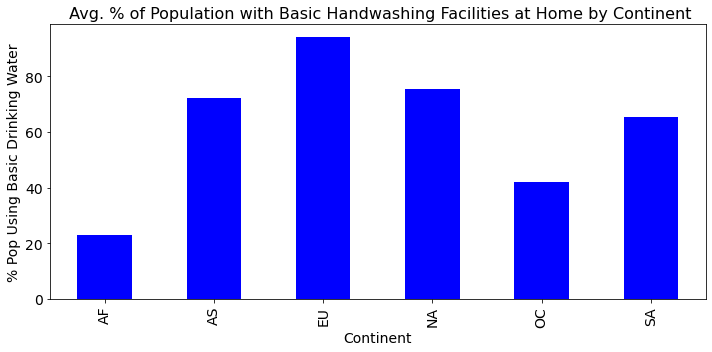

In [33]:
# Generate a bar plot showing Continent and access to handwashing facilities
final_df.groupby(["Continent"])["Population with basic handwashing facilities at home (%)"].mean().plot(kind = "bar", figsize=(10,5), color="b", fontsize=14)
plt.title(" Avg. % of Population with Basic Handwashing Facilities at Home by Continent",fontsize = 16)
plt.xlabel("Continent",fontsize = 14)
plt.ylabel("% Pop Using Basic Drinking Water",fontsize = 14)
plt.tight_layout()
plt.show()

In [35]:
# Generate a bar plot showing the total number of Pharmicists by Continent based on Life Expectancy using pyplot.
pharmicists_list =(final_df.groupby(["Continent"])["Pharmicists Per 10,000"].count()).tolist()
pharmicists_list

[302, 566, 736, 57, 73, 51]

Text(0, 0.5, 'Pharmicists per 10,000')

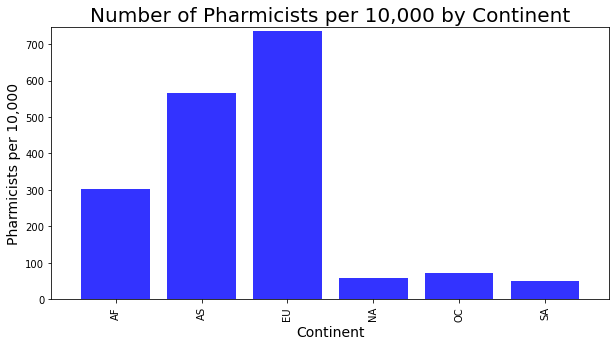

In [39]:
# Create the Bar Chart using pyplot
x_axis = np.arange(len(pharmicists_list))
plt.figure(figsize=(10,5))
plt.bar(x_axis, pharmicists_list, color='b', alpha=0.8, align='center')

tick_locations = [value for value in x_axis]

plt.xticks(tick_locations, ["AF", "AS", "EU" , "NA", "OC", "SA"],  rotation='vertical')

plt.xlim(-0.75, len(x_axis)-0.25)

plt.ylim(0, max(pharmicists_list)+10)

plt.title("Number of Pharmicists per 10,000 by Continent",fontsize = 20)
plt.xlabel("Continent",fontsize = 14)
plt.ylabel("Pharmicists per 10,000",fontsize = 14)

In [41]:
# Generate a pie plot showing the distribution of Medical Doctors per 10,000 by Continent 
medical_doctors_group = final_df.groupby(["Continent"])["Medical Doctors Per 10,000"].nunique()
medical_doctors_group

Continent
AF    272
AS    649
EU    791
NA    212
OC    102
SA    117
Name: Medical Doctors Per 10,000, dtype: int64

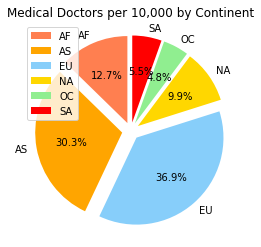

In [53]:
# The colors of each section of the pie chart & the explode
colors = ["coral", "orange", "lightskyblue", "gold", "lightgreen", "red"]
explode = (0.1, 0.1, 0.1, 0.1, 0.1, 0.1)
# Create pie chart using pandas.
doctors_pie = medical_doctors_group.plot(kind="pie", y="Continent", startangle=90, autopct="%1.1f%%", colors=colors, explode=explode)

# Add labels for axes and add a title for the graph.
doctors_pie.set_title("Medical Doctors per 10,000 by Continent")

# Hide y label
doctors_pie.set_ylabel('')

# Add legend
doctors_pie.legend(loc="upper left")

# Equal axis
doctors_pie.set_aspect('equal') 

# Show plot
plt.show()

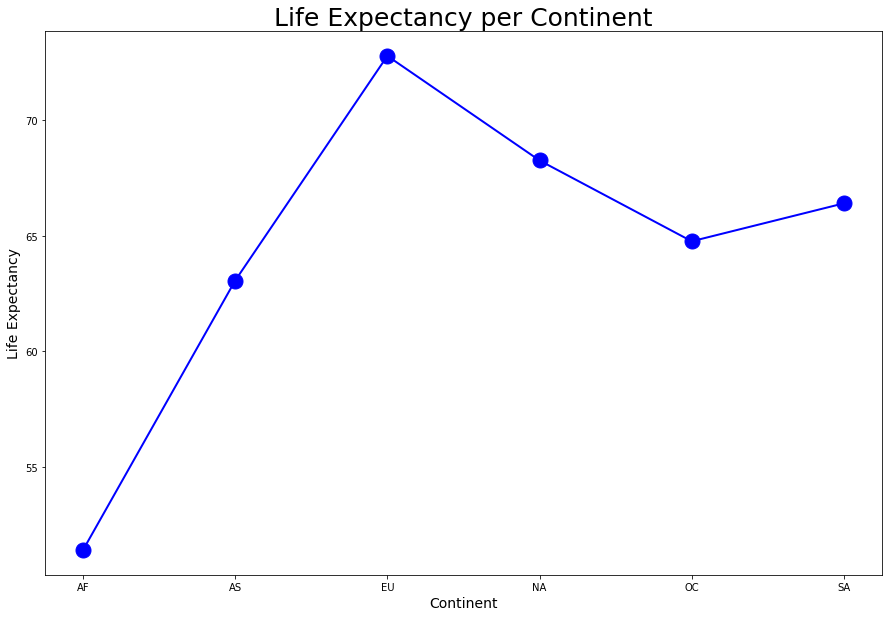

In [60]:
# Generate a line chart for Life Expectancy by Continent
x_axis = final_df.groupby(["Continent"])["Life Expectancy"].mean()

fig1, ax1 = plt.subplots(figsize=(15, 10))
plt.title("Life Expectancy per Continent",fontsize =25)
plt.plot(x_axis, linewidth=2, markersize=15,marker="o",color="blue")
plt.xlabel("Continent",fontsize =14)
plt.ylabel("Life Expectancy",fontsize =14)

plt.show()

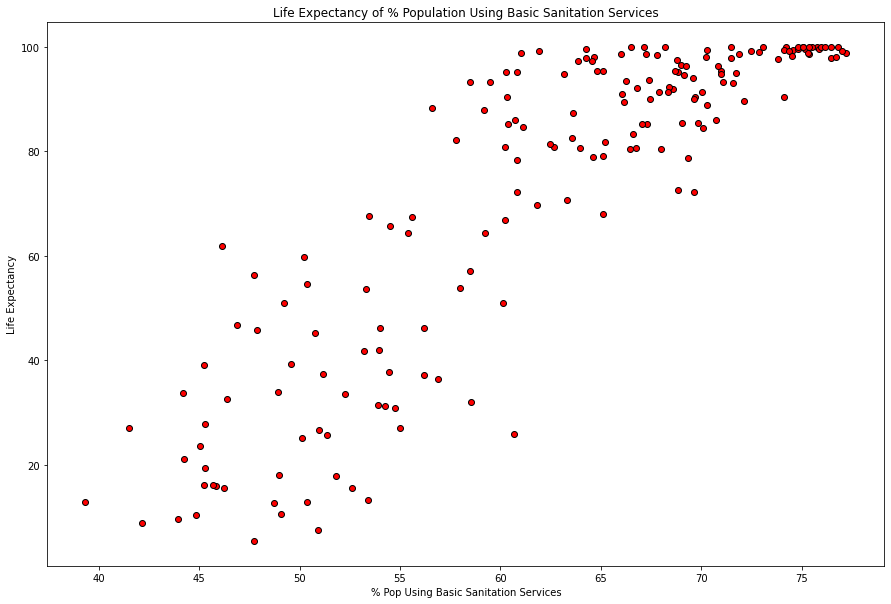

In [72]:
# Generate a scatter plot of Population using at least basic sanitization services (%) by Location
fig1, ax1 = plt.subplots(figsize=(15, 10))

life = (final_df.groupby(["Location"])["Life Expectancy"].mean())
sanitation = (final_df.groupby(["Location"])["Population using at least basic sanitization services (%)"]).mean()

# Tell matplotlib to create a scatter plot based upon the above data
marker_size = 15
plt.scatter(life, sanitation, marker="o", facecolors="red", edgecolors="black")

# Set the upper and lower limits of our y axis
# plt.ylim(180,620)
# Set the upper and lower limits of our x axis
# plt.xlim(11,26)

# Create a title, x label, and y label for our chart
plt.title("Life Expectancy of % Population Using Basic Sanitation Services")
plt.xlabel("% Pop Using Basic Sanitation Services")
plt.ylabel("Life Expectancy")

plt.show()